In [1]:
import mediapipe as mp  # Line 1: Imports MediaPipe library (mp alias). This is Google's toolkit for pose/hand/face detection—pre-trained on millions of images.
import cv2  # Line 2: Imports OpenCV (cv2) for image loading, drawing lines/dots, and display.
# Line 4: Jupyter magic command—shows plots inline (not pop-up windows).
%matplotlib inline

# Initialize MediaPipe Pose  # Line 6: Comment—preps the detector.
mp_pose = mp.solutions.pose  # Line 7: mp.solutions.pose accesses the pose module (33 keypoints: nose, eyes, shoulders, etc.).
mp_drawing = mp.solutions.drawing_utils  # Line 8: mp.solutions.drawing_utils for drawing keypoints (dots) and connections (lines) on images.

print("MediaPipe Pose ready!")  # Line 10: Print confirms imports—no errors? Model loaded.

MediaPipe Pose ready!


In [5]:
import os  # Line 1: Import OS for paths/listing (if not in Cell 1).

# Check YogaPoses folder  # Line 3: Comment.
yoga_path = 'data/YogaPoses'  # Line 4: Your unzip root.
if os.path.exists(yoga_path):
    subfolders = os.listdir(yoga_path)  # Line 6: Lists all subfolders.
    print(f"Exact subfolders in {yoga_path}: {subfolders}")  # Line 7: Prints list (e.g., ['Downdog', 'Goddess']).
    
    # Check for Downdog variants  # Line 9: Comment.
    possible = ['Downdog', 'downdog', 'DownDog', 'down dog', 'DownwardDog']  # Line 10: Common spellings.
    for pose in possible:
        pose_path = os.path.join(yoga_path, pose)  # Line 12: Builds path.
        if os.path.exists(pose_path):
            jpgs = [f for f in os.listdir(pose_path) if f.endswith('.jpg')]  # Line 13: Counts JPGs.
            print(f"Found '{pose}' with {len(jpgs)} JPGs. First: {jpgs[0] if jpgs else 'None'}")  # Line 14: Details.
        else:
            print(f"'{pose}' not found.")  # Line 16: Skip.
else:
    print(f"{yoga_path} not found—check unzip.")  # Line 18: Root issue.

data/YogaPoses not found—check unzip.


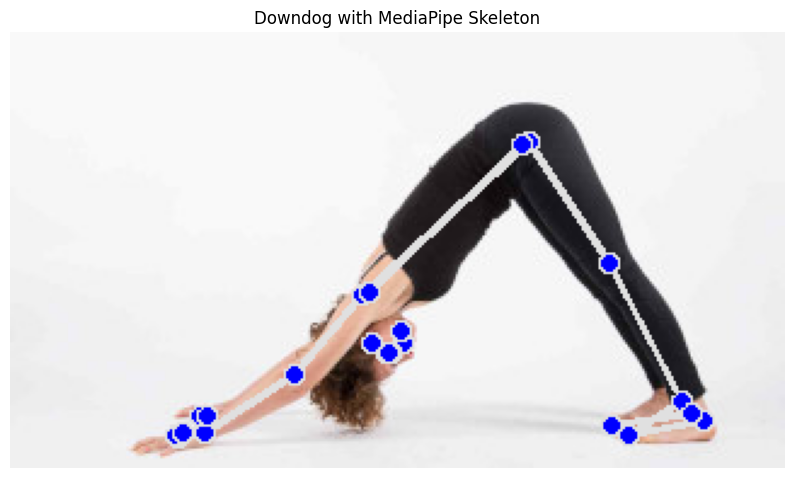

Keypoints extracted!


In [7]:
import os  # Line 0: Import OS for paths (from previous fix).
import matplotlib.pyplot as plt  # Line 1: Import Matplotlib (plt alias) for plotting—fixes NameError.

# Load a sample image (from your dataset)  # Line 3: Comment.
yoga_path = 'data/Yoga_poses'  # Line 4: Root path.
target_pose = 'Downdog'  # Line 5: Exact from diagnostic.
pose_folder = os.path.join(yoga_path, target_pose)  # Line 6: Full folder path.
image_files = os.listdir(pose_folder)  # Line 7: List files.
sample_img_path = os.path.join(pose_folder, [f for f in image_files if f.endswith('.jpg')][0])  # Line 8: First JPG path.

image = cv2.imread(sample_img_path)  # Line 10: Load image.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Line 11: To RGB.

# Run pose detection  # Line 13: Comment.
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:  # Line 14: Pose detector.
    results = pose.process(image_rgb)  # Line 15: Process.

# Draw skeleton if detected  # Line 17: Comment.
if results.pose_landmarks:  # Line 18: If keypoints found.
    annotated_image = image_rgb.copy()  # Line 19: Copy for drawing.
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)  # Line 20: Draw dots/lines.
    
    # Display with Matplotlib  # Line 22: Comment.
    plt.figure(figsize=(10, 10))  # Line 23: Figure size.
    plt.imshow(annotated_image)  # Line 24: Show image.
    plt.title('Downdog with MediaPipe Skeleton')  # Line 25: Title.
    plt.axis('off')  # Line 26: No axes.
    plt.show()  # Line 27: Render plot.
else:
    print("No pose detected—try a clearer image!")  # Line 29: Fallback.

print("Keypoints extracted!")  # Line 31: Success.

In [8]:
import numpy as np  # Line 1: Import NumPy (np alias) for array operations—keypoints become NumPy arrays for ML.

# Extract keypoints to array (reuse results from Cell 2)  # Line 3: Comment.
if results.pose_landmarks:  # Line 4: Checks if keypoints were detected (results.pose_landmarks = list of 33 landmark objects).
    keypoints = []  # Line 5: Empty list to collect 3 values per keypoint (x, y, z).
    for landmark in results.pose_landmarks.landmark:  # Line 6: 'for' loop over the 33 landmarks (each landmark = object with x,y,z,visibility properties).
        keypoints.append([landmark.x, landmark.y, landmark.z])  # Line 7: Append list of [x, y, z] for this landmark. x/y = normalized coords (0-1 fraction of image width/height); z = relative depth (negative for closer to camera). Visibility ignored for now (add later for confidence).
    
    keypoints_array = np.array(keypoints).flatten()  # Line 9: Converts list to NumPy array (shape 33 rows x 3 cols = (33,3)). flatten() makes 1D vector ((99,))—flat input for models like CNN.
    print(f"Keypoints shape: {keypoints_array.shape}")  # Line 10: Prints shape—expect (99,) for full pose.
    print(f"Sample: Nose (keypoint 0) x,y,z = {keypoints_array[0:3]}")  # Line 11: First 3 values = nose. E.g., [0.48, 0.25, -0.12] (middle-top, slight depth).
    print(f"Right shoulder (keypoint 11) x,y,z = {keypoints_array[33:36]}")  # Line 12: Example midpoint—keypoints indexed 0-32 (nose=0, shoulders=11/12, etc.).
    
    # Save for later use (e.g., Day 5 batch)  # Line 14: Comment.
    np.save('data/sample_keypoints.npy', keypoints_array)  # Line 15: np.save writes array to binary .npy file (fast load with np.load). 'data/sample_keypoints.npy' = path.
    print("Saved keypoints to sample_keypoints.npy")  # Line 16: Log success.
else:
    print("No keypoints to extract—run Cell 2 first!")  # Line 18: Fallback if no detection.

print("Keypoint extraction complete!")  # Line 20: Final print.

Keypoints shape: (99,)
Sample: Nose (keypoint 0) x,y,z = [ 0.50811493  0.71366179 -0.05336188]
Right shoulder (keypoint 11) x,y,z = [ 0.45367584  0.60474473 -0.26485732]
Saved keypoints to sample_keypoints.npy
Keypoint extraction complete!


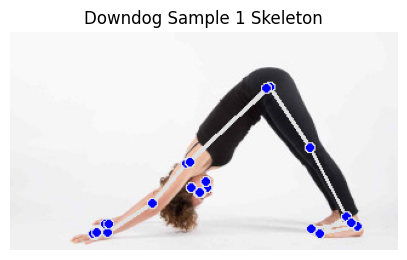

Sample 1: Keypoints extracted (shape (99,))


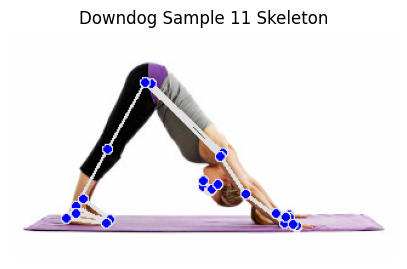

Sample 11: Keypoints extracted (shape (99,))


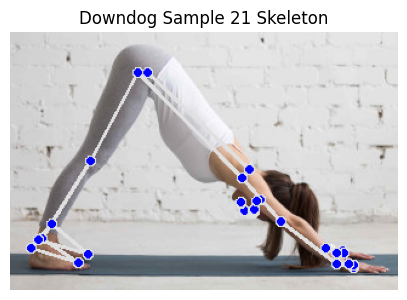

Sample 21: Keypoints extracted (shape (99,))
Saved 3 keypoints arrays: shape (3, 99)


In [9]:
# Test on 3 sample images (diverse from your 50)  # Line 1: Comment.
sample_indices = [0, 10, 20]  # Line 2: List of 3 file indices from image_files (Cell 2 memory—spread out for variety).
all_keypoints = []  # Line 3: Empty list to collect 3 arrays (later stack to 3x99).

for idx in sample_indices:  # Line 5: 'for' loop over the 3 indices.
    sample_path = os.path.join(pose_folder, image_files[idx])  # Line 6: Full path for this sample (reuses pose_folder/image_files from Cell 2).
    sample_image = cv2.imread(sample_path)  # Line 7: Load as BGR array.
    sample_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Line 8: To RGB for MediaPipe.
    
    # Run detection  # Line 10: Comment.
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:  # Line 11: Fresh Pose instance (good for batch—avoids state).
        sample_results = pose.process(sample_rgb)  # Line 12: Detect keypoints.
    
    if sample_results.pose_landmarks:  # Line 14: If success.
        # Draw skeleton  # Line 16: Comment.
        annotated = sample_rgb.copy()  # Line 17: Copy image.
        mp_drawing.draw_landmarks(annotated, sample_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)  # Line 18: Draw dots/lines.
        
        # Display each  # Line 20: Comment.
        plt.figure(figsize=(5, 5))  # Line 21: Smaller figure for batch (5x5 per image).
        plt.imshow(annotated)  # Line 22: Show annotated image.
        plt.title(f'Downdog Sample {idx+1} Skeleton')  # Line 23: Title with index.
        plt.axis('off')  # Line 24: No axes.
        plt.show()  # Line 25: Render (3 plots total).
        
        # Extract keypoints  # Line 27: Comment.
        sample_keypoints = []  # Line 28: List for this image.
        for landmark in sample_results.pose_landmarks.landmark:  # Line 29: Loop 33 landmarks.
            sample_keypoints.append([landmark.x, landmark.y, landmark.z])  # Line 30: [x,y,z].
        sample_array = np.array(sample_keypoints).flatten()  # Line 31: To (99,) array.
        all_keypoints.append(sample_array)  # Line 32: Add to batch list.
        print(f"Sample {idx+1}: Keypoints extracted (shape {sample_array.shape})")  # Line 33: Log per image.
    else:
        print(f"No detection for sample {idx+1}—skipping.")  # Line 35: Fallback.

# Save batch keypoints  # Line 37: Comment.
if all_keypoints:  # Line 38: If any success.
    all_keypoints_array = np.array(all_keypoints)  # Line 39: Stack to (3, 99) array.
    np.save('data/three_sample_keypoints.npy', all_keypoints_array)  # Line 40: Save binary.
    print(f"Saved 3 keypoints arrays: shape {all_keypoints_array.shape}")  # Line 41: E.g., (3, 99).
else:
    print("No keypoints from any sample.")  # Line 43: Fallback.